Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [2]:
df = pd.read_csv(r"C:/Users/Windows 11/Downloads/archive (15)/customer_shopping_data.csv")
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


Basic data understanding

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Data cleaning & preprocessing

In [4]:
# Convert invoice_date to datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

# Drop rows with missing values
df = df.dropna()

df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,2022-03-06,Kanyon


Feature engineering (Total Price)

In [5]:
df["total_price"] = df["quantity"] * df["price"]
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-04-11,Metrocity,2700.72
14,I336189,C555402,Female,67,Clothing,2,600.16,Credit Card,2022-03-06,Kanyon,1200.32


Sales by Gender

In [6]:
gender_sales = (df.groupby("gender")["total_price"].sum().reset_index())
gender_sales


,gender,total_price
0,Female,60412360.12
1,Male,40758878.50


Visualization – Sales by Gender

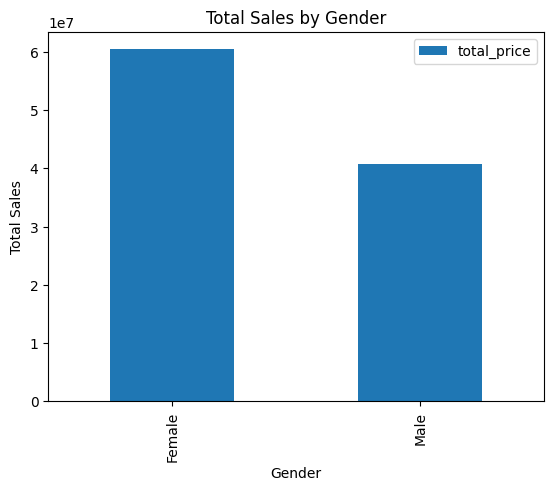

In [7]:
gender_sales.plot(kind="bar", x="gender", y="total_price")
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


Sales by Category

In [8]:
top_cats = (df.groupby("category")["total_price"].sum().sort_values(ascending=False))
top_cats

category
Clothing           45665574.24
Shoes              27187701.00
Technology         23081100.00
Cosmetics           2685755.64
Toys                1616527.36
Food & Beverage      344683.15
Books                344435.25
Souvenir             245461.98
Name: total_price, dtype: float64

Visualization – Sales by Category

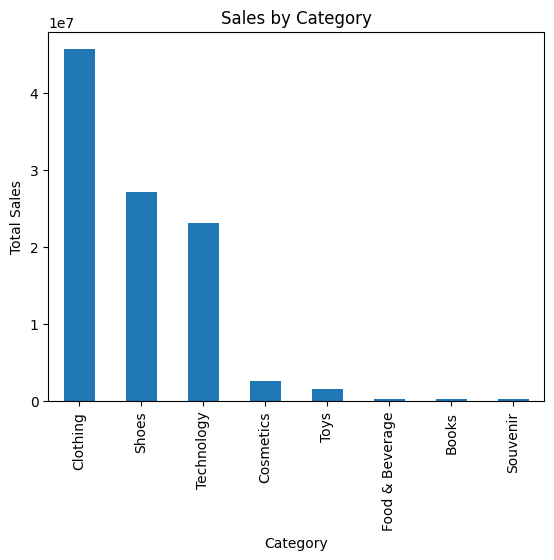

In [9]:
top_cats.plot(kind="bar")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


Monthly Sales Analysis

In [10]:
df["month"] = df["invoice_date"].dt.month

monthly_sales = df.groupby("month")["total_price"].sum()
monthly_sales


month
1     8251595.34
2     8477894.32
3     8672458.43
4     8694447.93
5     8594929.99
6     8934732.76
7     8279003.52
8     8282466.85
9     8064460.75
10    8350404.91
11    8162246.91
12    8406596.91
Name: total_price, dtype: float64

Visualization – Monthly Sales Trend

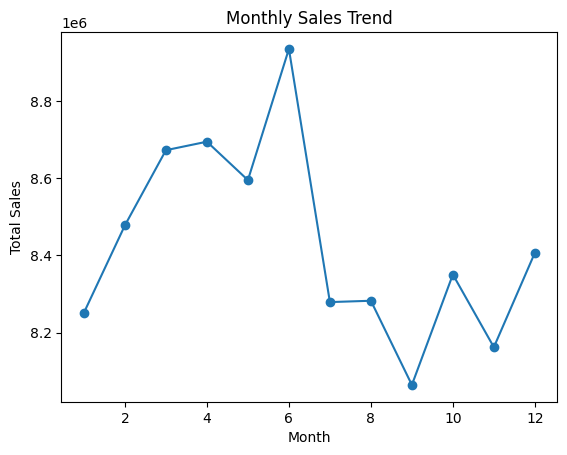

In [11]:
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


KPIs - Total Revenue,Total Orders,Total Customers,Average Order Value (AOV)

In [12]:
total_revenue = df["total_price"].sum()
total_orders = df["invoice_no"].nunique()
total_customers = df["customer_id"].nunique()
aov = total_revenue / total_orders

pd.DataFrame({"Metric": ["Total Revenue", "Total Orders", "Total Customers", "Avg Order Value"],"Value": [total_revenue, total_orders, total_customers, aov]
})


,Metric,Value
0,Total Revenue,1.011712e+08
1,Total Orders,4.002900e+04
2,Total Customers,4.002900e+04
3,Avg Order Value,2.527449e+03


Customer Spending Segmentation

In [15]:
customer_spend = df.groupby("customer_id")["total_price"].sum()

customer_spend.describe()



count    40029.000000
mean      2527.448565
std       4216.941539
min          5.230000
25%        130.750000
50%        600.170000
75%       2700.720000
max      26250.000000
Name: total_price, dtype: float64

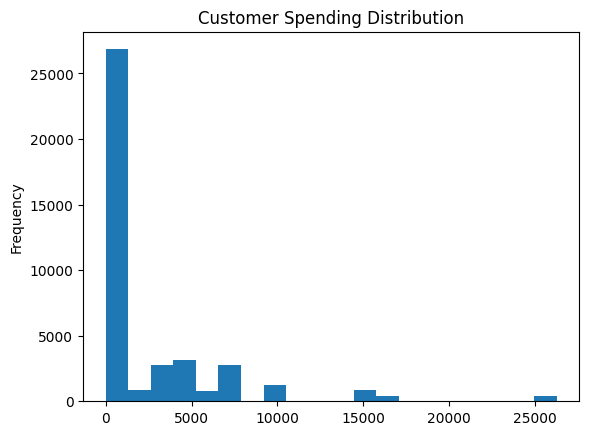

In [16]:
customer_spend.plot(kind="hist", bins=20)
plt.title("Customer Spending Distribution")
plt.show()


Day / Month Trend Analysis

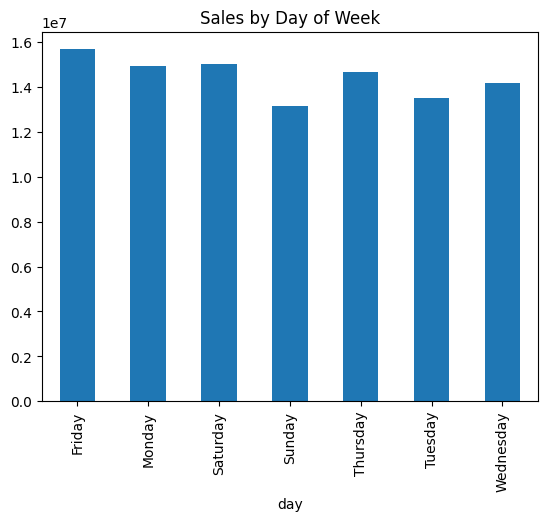

In [17]:
df["day"] = df["invoice_date"].dt.day_name()

day_sales = df.groupby("day")["total_price"].sum()

day_sales.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.show()


Category × Gender Cross Analysis

In [18]:
cat_gender = pd.pivot_table(
    df,
    values="total_price",
    index="category",
    columns="gender",
    aggfunc="sum"
)

cat_gender


gender,Female,Male
category,,
Books,202055.55,142379.70
Clothing,27572550.72,18093023.52
Cosmetics,1597246.78,1088508.86
Food & Beverage,206438.56,138244.59
Shoes,15771867.43,11415833.57
Souvenir,145686.60,99775.38
Technology,13947150.00,9133950.00
Toys,969364.48,647162.88


Visualization

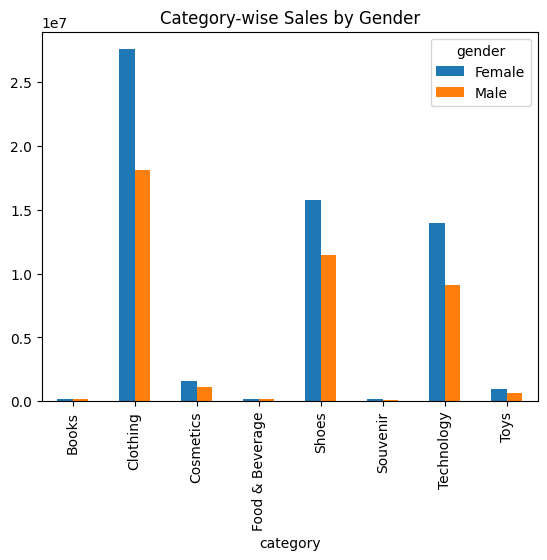

In [19]:
cat_gender.plot(kind="bar")
plt.title("Category-wise Sales by Gender")
plt.show()
